# Medical Cost Personal Insurance Project


Batch -DS2309


# Import Neccesary Libraries

In [1]:
 import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated 

Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance


In [4]:
df=pd.read_csv('C:/Users/HP/Desktop/Learning-2023/ML-Datasets/Medical Cost Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now, we can observe the data and its shape(rows x columns)

This dataset contains 1338 data points with 6 independent features and 1 target feature(charges).

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


we can see that the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset contains 6 indepandance feature and 1 target feature(charges),it contains starting  5 features.

In [15]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


it contains last 5 target features.

In [16]:
df.shape

(1338, 7)

In [17]:
print(f"The rows and columns in the dataset:{df.shape}")
print(f"\n The column headers in the dataset:{df.columns}")

The rows and columns in the dataset:(1338, 7)

 The column headers in the dataset:Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


This line are shows there arde 1338 rows and 7 column and another one is coloumn header index /dtype.

In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can look at the descriptive statistical measures of the continuous data available in the dataset.

In [19]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

It gives brief about the dataset which includes indexing type, int,dtype,float.

In [20]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

here we can conclude that there are no null values in the dataset given.

# Let's visualize it using heatmap

<Axes: >

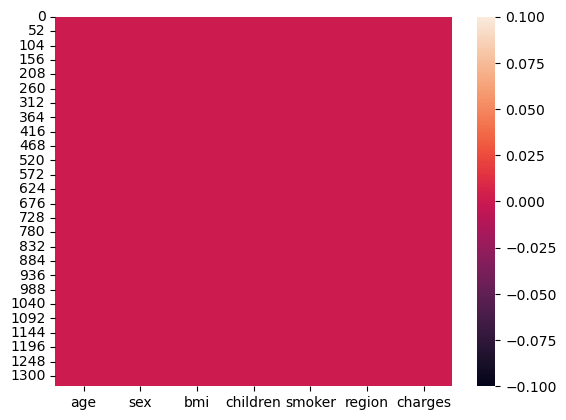

In [21]:
sns.heatmap(df.isnull())

There is no null values in this  chart.

C:\Users\HP\AppData\Local\Temp\ipykernel_5976\2577148653.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i + 1)


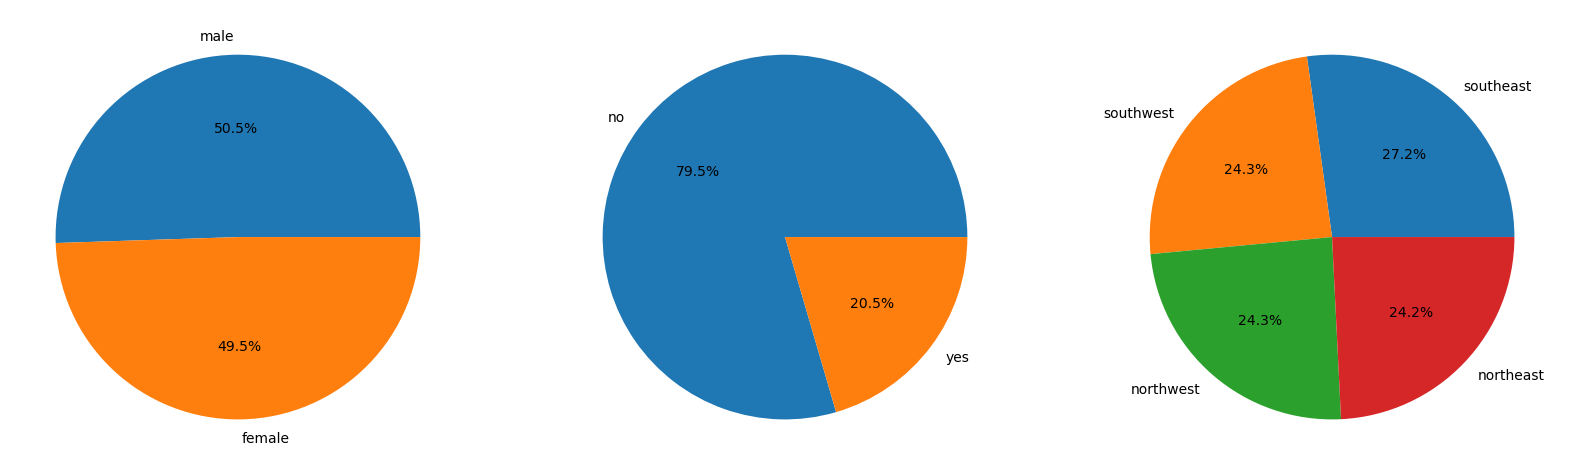

In [23]:
features = ['sex', 'smoker', 'region']
 
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
 
    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
 
plt.show()

The data provided to us is equally distributed among the sex and the region columns but in the smoker column, we can observe a ratio of 80:20.

In [24]:
df['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

This is  provide us four diffrent data(dtype-int64) in two regions.

In [25]:
df['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [26]:
#converting categorical to numerical
clean_df = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
df_copy = df.copy()
df_copy.replace(clean_df, inplace=True)

In [27]:

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


it provide dtypes,int and hpw much memory usage-73.3kb.

In [28]:
df_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [29]:
df_copy.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


it shows no of unique value are present in this dataset.

In [31]:
#checking the value counts of each column
for i in df_copy.columns:
    print(df_copy[i].value_counts())
print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
0    676
1    662
Name: sex, dtype: int64
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
0    1064
1     274
Name: smoker, dtype: int64
2    364
3    325
0    325
1    324
Name: region, dtype: int64
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28

In [32]:
df_copy.duplicated().sum()

1

<Axes: >

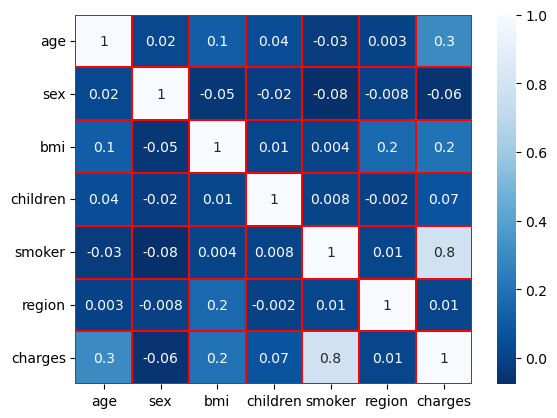

In [36]:
sns.heatmap(df_copy.corr(),linewidth=0.1,fmt="0.1g",linecolor='red',annot=True,cmap="Blues_r")

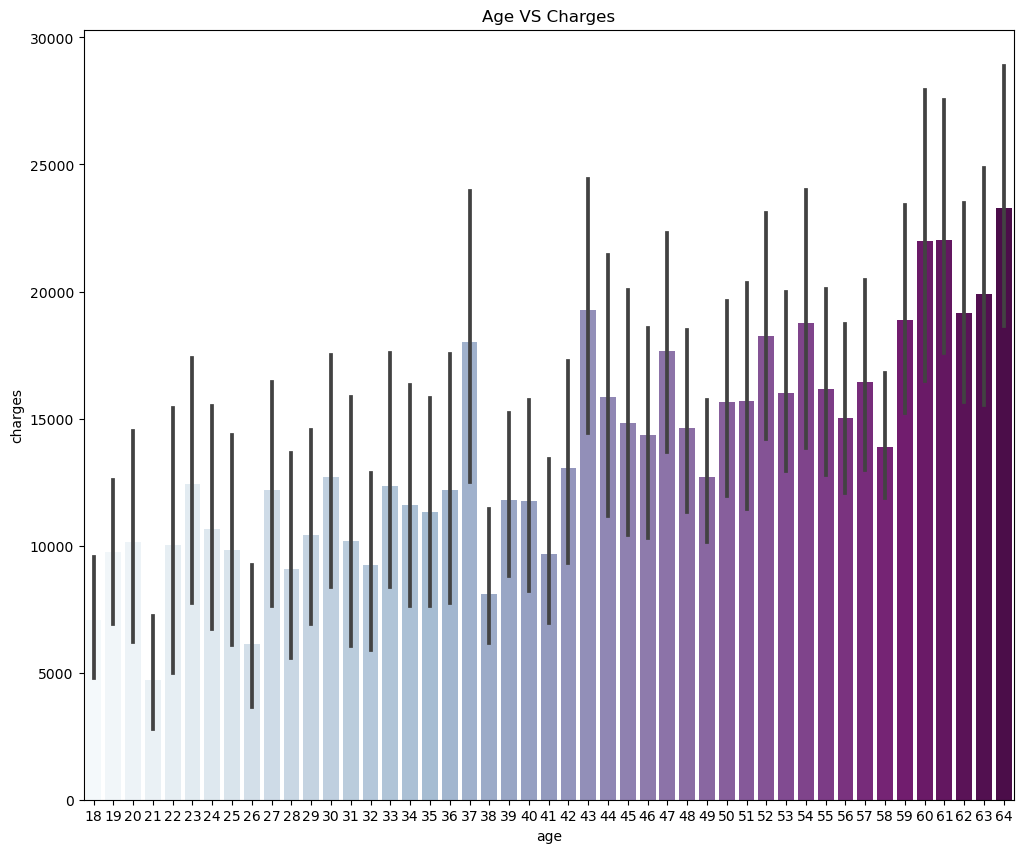

In [37]:
plt.figure(figsize=(12,10))
plt.title('Age VS Charges')
sns.barplot(x='age',y='charges',data=df_copy,palette='BuPu')
plt.show()

its provide age vs charges ratio.

C:\Users\HP\AppData\Local\Temp\ipykernel_5976\2759474991.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)
C:\Users\HP\AppData\Local\Temp\ipykernel_5976\2759474991.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(col).mean()['charges'].plot.bar()
C:\Users\HP\AppData\Local\Temp\ipykernel_5976\2759474991.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(col).mean()['charges'].plot.bar()
C:\Users\HP\AppData\Local\Temp\ipykernel_597

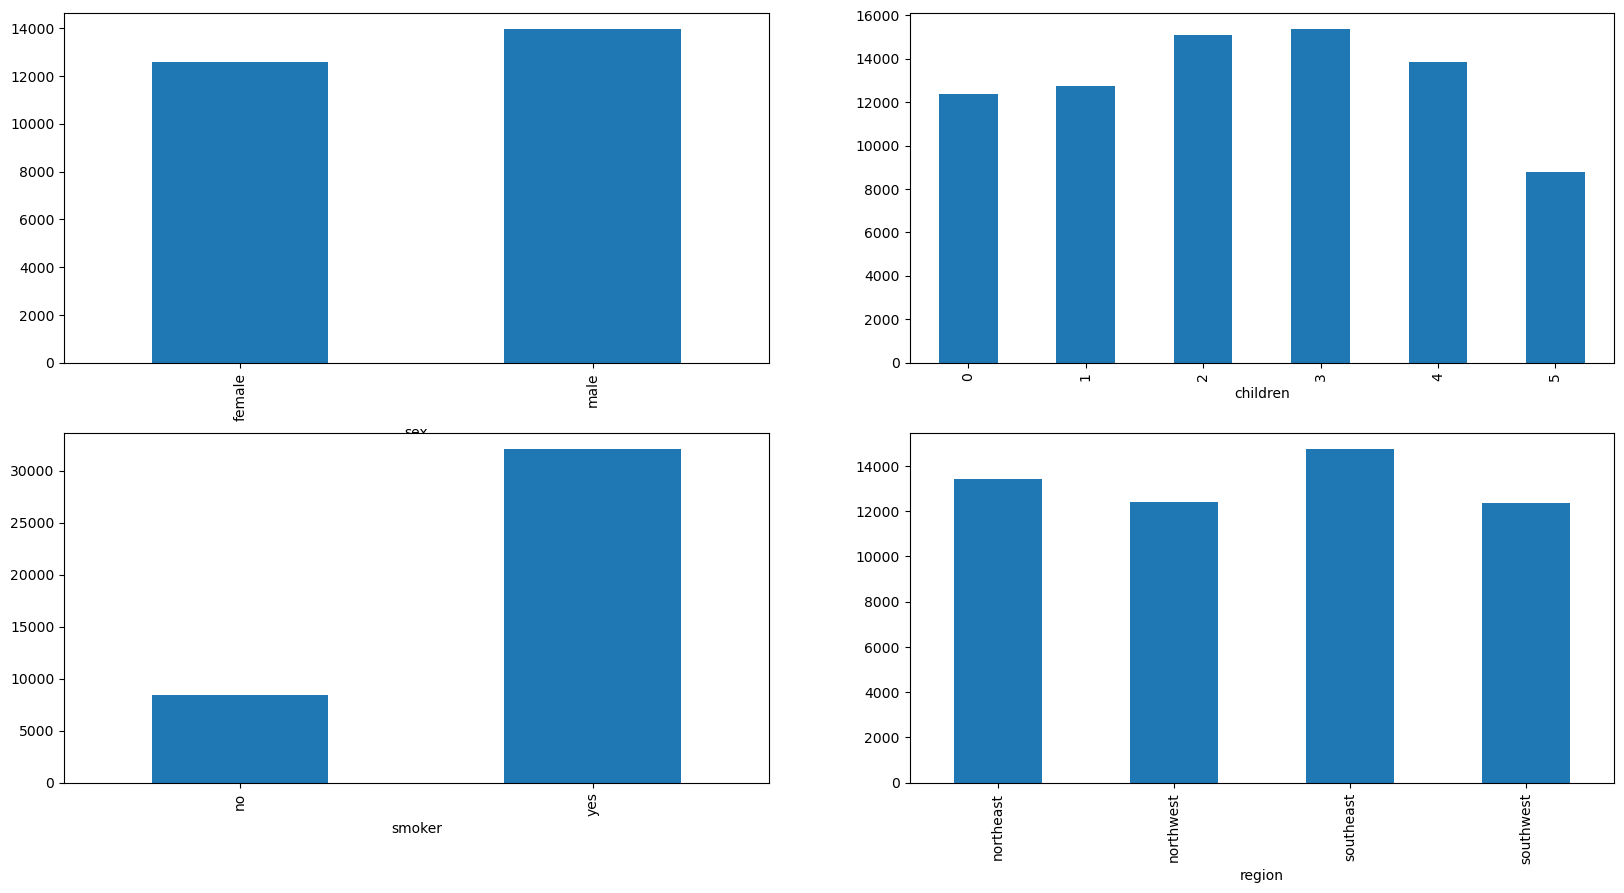

In [38]:
features = ['sex', 'children', 'smoker', 'region']
 
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['charges'].plot.bar()
plt.show()

Charges are on the higher side for males as compared to females but the difference is not that much.
Premium charged from the smoker is around thrice that which is charged from non-smokers.
Charges are approximately the same in the given four regions.
features = ['age', 'bmi']

<Axes: >

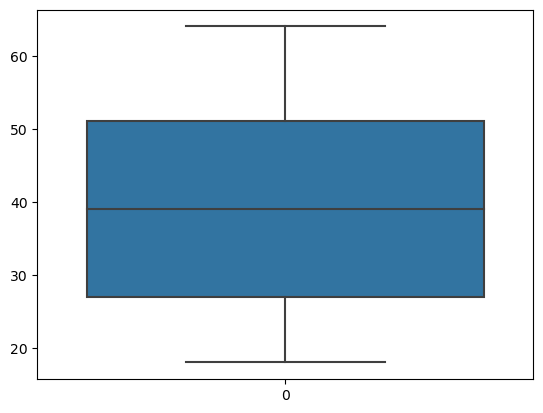

In [41]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

we can see that there are no outliers present in age column

<Axes: >

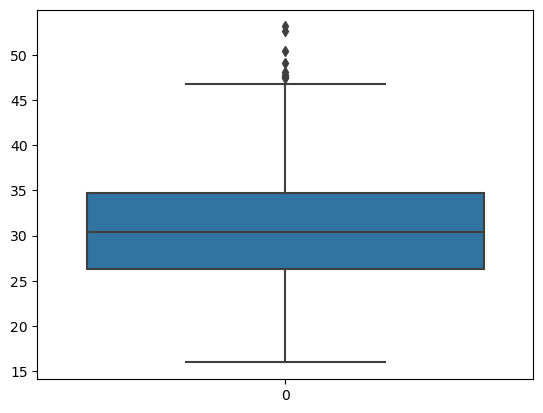

In [42]:
sns.boxplot(df['bmi'])

Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [51]:
from scipy.stats import zscore

In [53]:
out_features=df_copy[['charges','age','sex','bmi','children','smoker','region']]
df=np.abs(zscore(out_features))
df

,charges,age,sex,bmi,children,smoker,region
0,0.298584,1.438764,1.010519,0.453320,0.908614,1.970587,1.343746
1,0.953689,1.509965,0.989591,0.509621,0.078767,0.507463,0.438898
2,0.728675,0.797954,0.989591,0.383307,1.580926,0.507463,0.438898
3,0.719843,0.441948,0.989591,1.305531,0.908614,0.507463,1.370796
4,0.776802,0.513149,0.989591,0.292556,0.908614,0.507463,1.370796
...,...,...,...,...,...,...,...
1333,0.220551,0.768473,0.989591,0.050297,1.580926,0.507463,1.370796
1334,0.914002,1.509965,1.010519,0.206139,0.908614,0.507463,0.465949
1335,0.961596,1.509965,1.010519,1.014878,0.908614,0.507463,0.438898
1336,0.930362,1.296362,1.010519,0.797813,0.908614,0.507463,1.343746
